<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#SQLAlchemy" data-toc-modified-id="SQLAlchemy-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>SQLAlchemy</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Преимущества" data-toc-modified-id="Преимущества-1.0.1"><span class="toc-item-num">1.0.1&nbsp;&nbsp;</span>Преимущества</a></span></li></ul></li><li><span><a href="#Архитектура-SQLAlchemy" data-toc-modified-id="Архитектура-SQLAlchemy-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Архитектура SQLAlchemy</a></span><ul class="toc-item"><li><span><a href="#Установка-SQLAlchemy" data-toc-modified-id="Установка-SQLAlchemy-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Установка SQLAlchemy</a></span></li></ul></li><li><span><a href="#Создание-схемы-в-SQLAlchemy-ORM" data-toc-modified-id="Создание-схемы-в-SQLAlchemy-ORM-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Создание схемы в SQLAlchemy ORM</a></span><ul class="toc-item"><li><span><a href="#Создание-моделей" data-toc-modified-id="Создание-моделей-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Создание моделей</a></span></li><li><span><a href="#Запросы" data-toc-modified-id="Запросы-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Запросы</a></span></li><li><span><a href="#Запросы" data-toc-modified-id="Запросы-1.2.3"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>Запросы</a></span></li><li><span><a href="#Запросы" data-toc-modified-id="Запросы-1.2.4"><span class="toc-item-num">1.2.4&nbsp;&nbsp;</span>Запросы</a></span></li></ul></li></ul></li></ul></div>

# SQLAlchemy

**SQLAlchemy** — это программная библиотека на Python для работы с реляционными СУБД с
применением технологии ORM. Object-Relational Mapping, или объектно-реляционное отображение,
связывает базы данных с концепциями объектно-ориентированных языков, создавая «виртуальную
объектную БД». Служит для синхронизации объектов Python и записей реляционной базы данных.
SQLAlchemy позволяет описывать структуры баз данных и способы взаимодействия с ними на
Python, не используя SQL. Библиотека была выпущена в феврале 2006 под лицензией открытого ПО
MIT.
Работает back end для баз данных: MySQL, PostgreSQL, SQLite, Oracle и других, между которыми
можно переключаться изменением конфигурации.

### Преимущества
Использование SQLAlchemy для автоматической генерации SQL-кода имеет несколько преимуществ
по сравнению с ручным написанием SQL-запросов:
* Безопасность. Параметры запросов экранируются, что делает атаки типа внедрения
SQL-кода маловероятными;
* Производительность. Повышается вероятность повторного использования запроса к серверу
базы данных, что может позволить ему в некоторых случаях применить повторно план
выполнения запроса;
* Переносимость. SQLAlchemy при должном подходе позволяет писать на Python код,
совместимый с несколькими back end СУБД. Несмотря на стандартизацию языка SQL, базы
данных реализуют его по-разному. Абстрагироваться от этих нюансов помогает SQLAlchemy.

## Архитектура SQLAlchemy

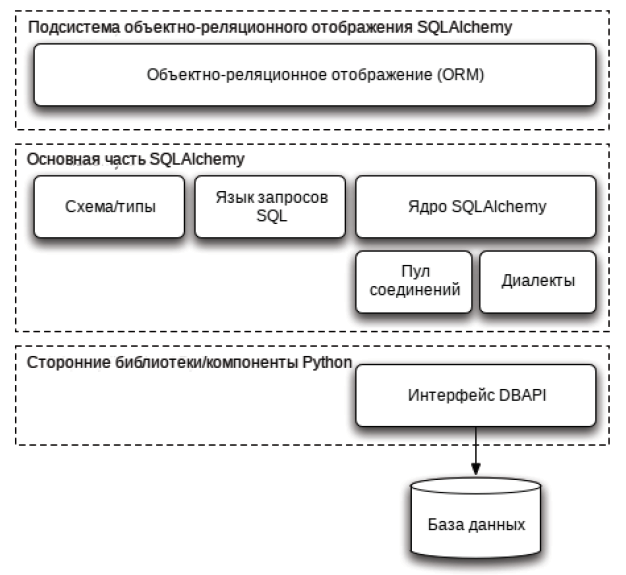

```SQLAlchemy``` предоставляет богатый API для каждого уровня взаимодействия с БД, разбивая общую
задачу взаимодействия на две категории: ядро (Core) и объектно-реляционное представление
(ORM). Ядро включает взаимодействие с Python DB-API, обработку текстовых SQL-запросов и
управление схемой БД (все эти части предоставляют API). ORM-часть — это библиотека, построенная
поверх ядра ```SQLAlchemy``` (разработчик может создать собственную).

Разделение на ядро и ORM всегда было особенностью ```SQLAlchemy```. В этом есть как плюсы, так и
минусы. Ядро ```SQLAlchemy``` позволяет ORM-слою:
* связывать в структуру ```Table``` атрибуты ```Python```-класса, а не имена полей из БД;
* для формирования ```SELECT-запроса``` использовать структуру ```select```, а не формировать строк запроса из разных частей;
* получать результат запроса через «фасад» (шаблон программирования) ResultProxy, который отображает select-структуру на каждую строку результата, а не передавать данные из курсора БД в пользовательские объекты.

Элементы ядра могут быть не видны в самом простом ```ORM```-приложении. Ядро аккуратно встроено в
ORM для плавного перехода между их конструкциями. Поэтому более сложное ```ORM```-приложение
может пропустить один или два уровня абстракции — чтобы взаимодействовать с БД, используя
специфические и улучшенные настройки (если требуется).
Обратной стороной подхода «ORM–ядро» является то, что инструкции должны пройти много этапов.
Стандартная реализация ```CPython``` имеет особенность вызова ```Python```-функций, которая снижает
быстродействие. Чтобы это обойти, можно сокращать цепочки вызовов функций и переносить
критичные к быстродействию участки на язык C. Разработчики ```SQLAlchemy``` используют оба подхода
для улучшения производительности (интерпретатор PyPy позволяет обходиться без трюков с
улучшением быстродействия).

### Установка SQLAlchemy

Установка ```SQLAlchemy``` стандартная:

```
pip install SQLAlchemy
```
Также можно скачать с официального сайта архив с ```SQLAlchemy``` и выполнить установочный скрипт
setup.py:

```
python setup.py install
```
Чтобы удостовериться в правильности установки, следует проверить версию библиотеки:
```python
import sqlalchemy
print("Версия SQLAlchemy:", sqlalchemy.__version__) # посмотреть версию SQLALchemy
```

## Создание схемы в SQLAlchemy ORM

```SQLAlchemy ORM``` (Object Relational Mapping или «объектно-реляционное отображение») — это способ создания таблиц и отношений между ними с помощью классов в ```Python```. Он также предоставляет систему для создания запросов и управления базой данных с помощью объектно-ориентированного кода вместо чистого ```SQL```. В отличие от ```SQLAlchemy Core```, который сосредоточен на таблицах, строках и колонках, во главе угла в случае с ```ORM``` стоят объекты и модели.

```ORM``` позволяет быть более продуктивным, но также добавляет дополнительную сложность в запросы. Однако для большинства приложений преимущества перевешивают проигрыш в производительности.

### Создание моделей

Модель — это класс ```Python```, соответствующий таблице в базе данных, а его свойства — это колонки.

Чтобы класс был валидной моделью, нужно соответствовать следующим требованиям:

1. Наследоваться от декларативного базового класса с помощью вызова функции ```declarative_base()```.
2. Объявить имя таблицы с помощью атрибута ```__tablename__```.
3. Объявить как минимум одну колонку, которая должна быть частью первичного ключа.

Последние два пункта говорят сами за себя, а вот для первого нужны детали.

Базовый класс управляет каталогом классов и таблиц. Другими словами, декларативный базовый класс — это оболочка над маппером и ```MetaData```. Маппер соотносит подкласс с таблицей, а MetaData сохраняет всю информацию о базе данных и ее таблицах. По аналогии с Core в ORM методы ```create_all()``` и ```drop_all()``` объекта ```MetaData``` используются для создания и удаления таблиц.

In [ ]:
from sqlalchemy import create_engine
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy.orm import sessionmaker

DATABASE_NAME = 'student.sqlite'

engine = create_engine(f'sqlite:///{DATABASE_NAME}')
Session = sessionmaker(bind=engine)

Base = declarative_base()

In [ ]:
from sqlalchemy import Column, Integer, String, ForeignKey


class Student(Base):
    __tablename__ = 'student'

    id = Column(Integer, primary_key=True)
    surname = Column(String)
    name = Column(String)
    patronymic = Column(String)
    age = Column(Integer)
    address = Column(String)

    def __init__(self, full_name: list[str], age: int, address: str):
        self.surname = full_name[0]
        self.name = full_name[1]
        self.patronymic = full_name[2]
        self.age = age
        self.address = address

    def __repr__(self):
        info: str = f'Студент [ФИО: {self.surname} {self.name} {self.patronymic}, ' \
            f'Возраст: {self.age}, Адрес: {self.address}]'
        return info

In [ ]:
Base.metadata.create_all(engine)

In [ ]:
from faker import Faker

def load_fake_student_data(session: Session):
    faker = Faker('ru_RU')
    for _ in range(50):
        full_name = faker.name().split(' ')
        age = faker.random.randint(18, 23)
        address = faker.address()
        student = Student(full_name, age, address)
        
        session.add(student)

    session.commit()
    session.close()

In [ ]:
load_fake_student_data(Session())

### Запросы

In [ ]:
from sqlalchemy import and_, or_
from sqlalchemy.orm import Session as SQLSession

session = Session()

print('*'*30)
print(f'Кол-во студентов: {session.query(Student).count()}')
print('*'*30)
# 
session.close()

In [ ]:
with Session() as session:
    print(session.query(Student).get(40))

In [ ]:
with Session() as session:
    print(session.query(Student).get(60))

In [ ]:
with Session() as session:
    students = session.query(Student)
    print(students)
    print("*" * 50)
#     print(type(students))
#     print("*" * 50)
#     for student in students:
#         print(student)
#     print("*" * 50)
#     print(students.all())
#     print(students.first())  

In [ ]:
with Session() as session:
    students = session.query(Student)
    
    all_stud = students.all()
    for student in all_stud:
        print(type(student), student.surname, student.name)

In [ ]:
with Session() as session:
    students = session.query(Student).filter(and_(Student.surname.like('А%'), Student.age > 18))
    print(students)
    print("*" * 50)
    
    for student in students:
        print(student)

In [ ]:
with Session() as session:
    for it in session.query(Student).filter(or_(Student.surname.like('А%'), Student.surname.like('В%'))):
        print(it)

***
***
***
***
***

In [ ]:
from sqlalchemy import create_engine
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy.orm import sessionmaker

DATABASE_NAME = 'student_group.sqlite'

engine = create_engine(f'sqlite:///{DATABASE_NAME}')
Session = sessionmaker(bind=engine)

Base = declarative_base()

In [ ]:
from sqlalchemy import Column, Integer, String, ForeignKey


class Student(Base):
    __tablename__ = 'student'

    id = Column(Integer, primary_key=True)
    surname = Column(String)
    name = Column(String)
    patronymic = Column(String)
    age = Column(Integer)
    address = Column(String)
    group_id = Column(Integer, ForeignKey('groups.id'))

    def __init__(self, full_name: list[str], age: int, address: str, id_group: int):
        self.surname = full_name[0]
        self.name = full_name[1]
        self.patronymic = full_name[2]
        self.age = age
        self.address = address
        self.group_id = id_group
    
    def __repr__(self):
        info: str = f'Студент [ФИО: {self.surname} {self.name} {self.patronymic}, ' \
            f'Возраст: {self.age}, ID группы: {self.group_id}]'
        return info

In [ ]:
from sqlalchemy import Column, Integer, String
from sqlalchemy.orm import relationship

class Group(Base):
    __tablename__ = 'groups'

    id = Column(Integer, primary_key=True)
    group_name = Column(String)
    student = relationship('Student')

    def __repr__(self):
        return f'Группа [ID: {self.id}, Название: {self.group_name}]'

In [ ]:
Base.metadata.create_all(engine)

In [ ]:
from faker import Faker

def load_fake_student_and_group_data(session: Session):

    group1 = Group(group_name='ИГ-19-1')
    group2 = Group(group_name='ИГ-19-2')
    session.add(group1)
    session.add(group2)

   
    faker = Faker('ru_RU')
    group_list = [group1, group2]
    session.commit()

    for _ in range(50):
        full_name = faker.name().split(' ')
        age = faker.random.randint(16, 25)
        address = faker.address()
        group = faker.random.choice(group_list)
        student = Student(full_name, age, address, group.id)
        session.add(student)

    session.commit()
    session.close()

In [ ]:
load_fake_student_and_group_data(Session())

### Запросы

In [ ]:
from sqlalchemy import and_, or_
from sqlalchemy.orm import Session as SQLSession

with Session() as session:
    query = session.query(Student, Group)
    print(query)
    print("*" * 50)
    
    for el in query:
        print(el)

In [ ]:
from sqlalchemy import and_, or_
from sqlalchemy.orm import Session as SQLSession

with Session() as session:
    student_query = session.query(Student).join(Group).filter(Group.group_name == 'ИГ-19-1')

    for student in student_query:
        print(student)

***
***
***
***
***

In [ ]:
from sqlalchemy import create_engine
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy.orm import sessionmaker

DATABASE_NAME = 'student_group_lesson.sqlite'

engine = create_engine(f'sqlite:///{DATABASE_NAME}')
Session = sessionmaker(bind=engine)

Base = declarative_base()

In [ ]:
from sqlalchemy import Column, Integer, String, ForeignKey


class Student(Base):
    __tablename__ = 'student'

    id = Column(Integer, primary_key=True)
    surname = Column(String)
    name = Column(String)
    patronymic = Column(String)
    age = Column(Integer)
    address = Column(String)
    group_id = Column(Integer, ForeignKey('groups.id'))

    def __init__(self, full_name: list[str], age: int, address: str, id_group: int):
        self.surname = full_name[0]
        self.name = full_name[1]
        self.patronymic = full_name[2]
        self.age = age
        self.address = address
        self.group_id = id_group

    def __repr__(self):
        info: str = f'Студент [ФИО: {self.surname} {self.name} {self.patronymic}, ' \
            f'Возраст: {self.age}, ID группы: {self.group_id}]'
        return info

In [ ]:
from sqlalchemy import Column, Integer, String
from sqlalchemy.orm import relationship

class Group(Base):
    __tablename__ = 'groups'

    id = Column(Integer, primary_key=True)
    group_name = Column(String)
    student = relationship('Student')

    def __repr__(self):
        return f'Группа [ID: {self.id}, Название: {self.group_name}]'

In [ ]:
from sqlalchemy import Column, Integer, String, Table, ForeignKey
from sqlalchemy.orm import relationship

association_table = Table('association', Base.metadata,
                          Column('lesson_id', Integer, ForeignKey('lessons.id')),
                          Column('group_id', Integer, ForeignKey('groups.id'))
                          )


class Lesson(Base):
    __tablename__ = 'lessons'

    id = Column(Integer, primary_key=True)
    lesson_title = Column(String)
    groups = relationship('Group', secondary=association_table, backref='group_lesson')

    def __repr__(self):
        return f'Предмет [ID: {self.id}, Название: {self.lesson_title}]'

In [ ]:
Base.metadata.create_all(engine)

In [ ]:
from faker import Faker

def load_fake_data(session: Session):
    lessons_names = ['Высшая геодезия', 'Приклодная геодезия', 'Безопастность жизнедеятельности',
                     'Метрология, стандартизация и сертификация', 'Фотограмметрия', 'Электрооптические и спутниковые измерения',
                     'Физкультура и спорт', 'Приклодная информатика']
    group1 = Group(group_name='ИГ-19-1')
    group2 = Group(group_name='ИГ-19-2')
    session.add(group1)
    session.add(group2)

    for key, it in enumerate(lessons_names):
        lesson = Lesson(lesson_title=it)
        lesson.groups.append(group1)
        if key % 2 == 0:
            lesson.groups.append(group2)
        session.add(lesson)

    faker = Faker('ru_RU')
    group_list = [group1, group2]
    session.commit()

    for _ in range(50):
        full_name = faker.name().split(' ')
        age = faker.random.randint(16, 25)
        address = faker.address()
        group = faker.random.choice(group_list)
        student = Student(full_name, age, address, group.id)
        session.add(student)

    session.commit()
    session.close()

In [ ]:
load_fake_data(Session())

### Запросы

In [ ]:
from sqlalchemy import and_, or_
from sqlalchemy.orm import Session as SQLSession

with Session() as session:
    for it in session.query(Lesson):
        print(it)

In [ ]:
from sqlalchemy import and_, or_
from sqlalchemy.orm import Session as SQLSession

with Session() as session:
    for it in session.query(Lesson).filter(Lesson.id > 3):
        print(it)

In [ ]:
from sqlalchemy import and_, or_
from sqlalchemy.orm import Session as SQLSession

with Session() as session:
    for it in session.query(Lesson).filter(or_(Lesson.lesson_title.like('П%'), Lesson.lesson_title.like('Ф%'))):
        print(it)

In [ ]:
from sqlalchemy import and_, or_
from sqlalchemy.orm import Session as SQLSession

with Session() as session:
    for it in session.query(Lesson, Group).filter(and_(
                                association_table.c.lesson_id == Lesson.id,
                                association_table.c.group_id == Group.id)):
        print(it)

In [ ]:
from sqlalchemy import and_, or_
from sqlalchemy.orm import Session as SQLSession

with Session() as session:
    for it in session.query(Lesson, Group).filter(and_(
                                association_table.c.lesson_id == Lesson.id,
                                association_table.c.group_id == Group.id,
                                Group.group_name == 'ИГ-19-2')):
        print(it)

In [ ]:
from sqlalchemy import and_, or_
from sqlalchemy.orm import Session as SQLSession

with Session() as session:
    for it in session.query(Lesson.lesson_title, Group.group_name).filter(and_(
                                association_table.c.lesson_id == Lesson.id,
                                association_table.c.group_id == Group.id,
                                Group.group_name == 'ИГ-19-2')):
        print(it)

***
***